# Otimizacao_Metaheuristica
<h2> Informações</h2>
Centro Federal de Educação Tecnológia Celso Suckow da Fonseca (CEFET/RJ)<br />
Trabalho da Disciplina: Otimização por Metaurísticas - Semestre 2022/02<br />

Artigo Base:
The Knapsack Problem with Forfeits
Cerulli, R., D’Ambrosio, C., Raiconi, A., Vitale, G. (2020). The Knapsack Problem with Forfeits. In: Baïou, M., Gendron, B., Günlük, O., Mahjoub, A.R. (eds) Combinatorial Optimization. ISCO 2020. Lecture Notes in Computer Science(), vol 12176. Springer, Cham. https://doi.org/10.1007/978-3-030-53262-8_22

<h2> Ações</h2><br/>

- [x] Viabilização de Instâncias
- [x] Algoritmos Construtivos (Guloso, Semi-Guloso, Aleatório)
- [X] Ajuste Algoritmo Construtivo com Penalidades
- [X] Algoritmo com Busca Local
- [X] Framework GRASP
- [X] Framework ILS
- [X] Framework VNS
- [X] Execução: 10x para cada Instância
- [X] Reportar Tabela: Melhor Solução
- [X] Reportar Tabela: Média da Solução
- [X] Reportar Tabela: Média do Tempo
- [X] Reportar Tabela: Coeficiente/Desvio de Variação das Soluções
- [X] Reportar Tabela: Coeficiente de Variação do Tempo

        

<h3>Classe para Leitura das Instâncias


In [1]:
import sys
import time
import numpy as np



class Instance:
    def __init__(self, filename):

        path = f"{filename}"

        f = open(path, "r")

        self.num_items, self.num_forfeits_pairs, self.budget = map(
            int, f.readline().split(" ")
        )

        f.close()

        # items definition
        items = []
        for i in range(self.num_items):
            items.append(i)

        self.items = np.array(items)

        line_counter = 1

        self.profits = np.loadtxt(
            path, delimiter=" ", skiprows=line_counter, max_rows=1
        )
        line_counter += 1

        self.weights = np.loadtxt(
            path, delimiter=" ", skiprows=line_counter, max_rows=1
        )
        line_counter += 1

        max = 2 * self.num_forfeits_pairs

        self.forfeit_cost_and_forfeits_pairs = np.loadtxt(
            path, delimiter=" ", skiprows=line_counter, max_rows=max, usecols=(0, 1)
        ).tolist()

        self.forfeits_costs = [
            v for i, v in enumerate(self.forfeit_cost_and_forfeits_pairs) if i % 2 == 0
        ]

        self.forfeits_pairs = [
            v for i, v in enumerate(self.forfeit_cost_and_forfeits_pairs) if i % 2 != 0
        ]

        # remove the first element of the sublist
        for i in range(len(self.forfeits_costs)):
            self.forfeits_costs[i].pop(0)

        # transform list of lists into a single list - flatten
        self.forfeits_costs = [
            item for sublist in self.forfeits_costs for item in sublist
        ]

        self.forfeits_costs = np.array(self.forfeits_costs)
        self.forfeits_pairs = np.array(self.forfeits_pairs)      

<h2>Montando a Matriz de Penalidades


In [2]:
def calculate_penalty(items,forfeits_pairs, forfeits_costs):
    mD=np.zeros((int(len(items)),int(len(items))))       
    
    for index, pair in enumerate(forfeits_pairs):
        mD[int(pair[0]),int(pair[1])]=forfeits_costs[index]                
    return mD

#with np.printoptions(edgeitems=500):
#    print(problem_instance.forfeits_pairs)

<h2>Funções Auxiliares 

<h3>Função para Cálculo do Lucro dos itens constantes como solução(incluídos na mochila)

In [3]:
def calcCost(solution, profits):
    cost = 0
    for sol in solution:
        sol = int(sol)
        cost = cost + profits[sol]
    return cost

<h3>Função para Cálculo do Lucro e Penalidades dos itens constantes como solução(incluídos na mochila)

In [4]:
def calcCostP(solutionc, weights, profits,mD):
    cost = 0
    scost=[]
    i=0
    for sol in solutionc:
        sol = int(sol)
        cost = cost + profits[sol] -sum(mD[sol][solutionc[0:i+1]])
        scost.append(profits[sol]-sum(mD[sol][solutionc[0:i+1]]))
        #print(f"Item atual: {sol}\n Solução Até agora: {solution[0:i+1]}")
        i=i+1
    return cost,scost

<h3> Função Para Cálculo da Capacidade Ocupada da Mochila

In [5]:
def calcb(solution, w):
    bres = 0
    for sol in solution:
        sol=int(sol)
        bres = bres + int(w[sol])
    return bres

<h1>Algoritmo Construtivo (Guloso, Aleatório e Semi-Guloso)</h1>

Guloso => Alpha=0 </br>
Aleatório => Alpha=1

In [6]:
import random as rd
import copy
def greedyalgorithm(items, weights, profits, budget, forfeits, forfeits_costs, alpha,mD):    
    
    cap=copy.deepcopy(budget)
    remaining_items = copy.deepcopy(items)
    #print(sorted_items)    
    solution=[]
    scost=[]
    #sweights=[]
    cost=0
    index=0
    
    if alpha ==1:  # totalmente aleatório 
        #remaining_items=zip(items,weights,profits)
        sorted_items=sorted(remaining_items, key= lambda x:profits[x]/(weights[x]+1), reverse=True)
        #print(tuple(items))        
        
        rd_index=rd.choice(range(0,len(sorted_items))) 
        candidate=sorted_items[rd_index]
        
        while cap-weights[candidate]>0:                                        
                cap=cap-weights[candidate]
                solution.append(candidate) 
                
                
                penalidade=sum(mD[candidate][solution])                
                #if penalidade>0: print(f"Penalidade do Item {sorted_items[rd_index][0]} é {penalidade}")
                    
                cost=cost+profits[candidate]-penalidade
                
                scost.append(profits[candidate]-penalidade)
                
                #sweights.append(weights[candidate])
                
                sorted_items.remove(sorted_items[rd_index])
                
                if len(sorted_items)>=0:
                    rd_index=rd.choice(range(0,len(sorted_items)))  
                    candidate=sorted_items[rd_index]
                else:
                    break;
        
                    
    else:
            if alpha == 0: #totalmente guloso
                
                sorted_items=sorted(remaining_items, key= lambda x:profits[x]/(weights[x]+1), reverse=True)
                
                candidate=sorted_items[0]
                while cap-weights[candidate]>0:                                                  
                    
                    #calcula a nova penalidade para o item a ser inserido no conjunto e reordena                                      
                                                          
                    
                    cap=cap-weights[candidate]
                    solution.append(candidate)  
                    
                    penalidade=sum(mD[candidate][solution])                
                   
                    
                  
                    cost=cost+profits[candidate]-penalidade
                    #cost=cost+sorted_items[index][2]-sum(mD[sorted_items[index][0]][solution])
                    
                    scost.append(profits[candidate]-penalidade)
                    
                                                           
                    sorted_items.remove(sorted_items[0])
                    
                    if len(sorted_items)>=0:                       
                        #adicionar o melhor como candidato
                        candidate=sorted_items[0]
                    else:
                        break;
                
                    
            else: # semi-guloso
               
                sorted_items=sorted(remaining_items, key= lambda x:profits[x]/(weights[x]+1), reverse=True)
                
                
                # o cálculo dos limites da lcr
                
                hmax=profits[sorted_items[0]]/(weights[sorted_items[0]]+1)
                hmin=profits[sorted_items[-1]]/(weights[sorted_items[-1]]+1)


                    #ub = hmax + alpha * (hmin - hmax)
                lb = hmin                            
                ub=hmax + alpha * (hmin - hmax)                  

                    #lista restrita de candidatos                    
                lcr=list(filter(lambda x: (profits[x]/weights[x])>=ub, sorted_items))
                rd_index=rd.choice(range(0,len(lcr))) 
                candidate=lcr[rd_index]
                
                #print(candidate)
                while cap-weights[candidate]>0:  
                                                                          
                    cap=cap-weights[candidate]
                    solution.append(candidate)    
                                       
                    
                    #penalidade
                    penalidade=sum(mD[candidate][solution])                
                    
                                        
                    cost=cost+profits[candidate]-penalidade                                        
                    
                    scost.append(profits[candidate]-penalidade)
                    
                    #sweights.append(weights[candidate])
                
                    #removendo o item já inserido
                    sorted_items.remove(sorted_items[sorted_items.index(lcr[rd_index])])                    
                                                                                         

                     # o cálculo dos limites da lcr
                    
                    hmax=profits[sorted_items[0]]/(weights[sorted_items[0]]+1)
                    hmin=profits[sorted_items[-1]]/(weights[sorted_items[-1]]+1)

                    
                    #ub = hmax + alpha * (hmin - hmax)
                    lb = hmin                            
                    ub=hmax + alpha * (hmin - hmax)
                 
                
                    if len(sorted_items)>=0:
                        #lista restrita de candidatos                                
                        lcr=list(filter(lambda x: (profits[x]/weights[x])>=ub, sorted_items))

                        #print(f"LCR: {lcr}")
                        rd_index=rd.choice(range(0,len(lcr))) 
                        candidate=lcr[rd_index]
                    else:
                        break;                                                                               
                                
    
    return solution,cost,scost,sorted_items

<h1>Algoritmo de Busca Local

<h1>Melhor Melhora

outro

In [7]:
import copy
def busca_local(solution,items,profits,weights,budget,mD):
    s1=copy.deepcopy(solution)
    s2=copy.deepcopy(solution)
    cost2=calcCostP(s2, weights, profits,mD)[0]
    #s1_mudou=True
    s1_mudou=False
    
#    print(sorted_items)
    
    #while s1_mudou==True:
    while s1_mudou==False:
        s1_mudou=False
        
        lista_itens=sorted(s1, key= lambda x:(profits[x]-sum(mD[x][s1]))/(weights[x]+1), reverse=True)
        num_itens_lista=len(lista_itens)
        i=1
        while i<=num_itens_lista and s1_mudou==False:
            pior_item=lista_itens[-1]
            
            sorted_items= list(set(items) - set(s1))
            #print(pior_item)
            s1_aux=copy.deepcopy(s1)
            s1.remove(pior_item) 
            sorted_items.append(pior_item)
            
            sorted_items=sorted(sorted_items, key= lambda x:(profits[x]-sum(mD[x][s1]))/(weights[x]+1), reverse=True)
            
            j=0
            print(calcb(s1,weights))
            print(f"Pior Item {pior_item}")
            while (budget-calcb(s1,weights)-weights[sorted_items[j]])>=0 and (profits[sorted_items[j]]-sum(mD[sorted_items[j]][s1]))>0 and len(sorted_items)>=0:
            #while (budget-calcb(s1,weights)-weights[sorted_items[j]])>=0 and len(sorted_items)>=0:
                melhor_item=sorted_items[0]
                s1.append(melhor_item)
                #print(f"Melhor Item {melhor_item}")
                sorted_items.remove(melhor_item)  
                #j=j+1
                               
            if s1!=s1_aux:
                s1_mudou=True
                print("mudou")
                #print(calcCostP(s1, weights, profits,mD))
                cost1=calcCostP(s1, weights, profits,mD)[0]                
                
                if cost1>cost2:
                    print(cost1)
                    s2=copy.copy(s1)
                    cost2=copy.copy(cost1)
                #else:
                    #s1=copy.copy(s1_aux)
                
            
            i=i+1
                            
    return s2,cost2

In [8]:
#melhor melhora
import copy
def busca_local2(solution,items,profits,weights,budget,mD):
    s1=copy.deepcopy(solution)
    s2=copy.deepcopy(solution)
    cost2=calcCostP(s2, weights, profits,mD)[0]
    s1_mudou=True
       
    while s1_mudou==True:
        s1_mudou=False        

        for item in s1:                    
            remaining_items= list(set(items) - set(s1))
            
            
            s1_aux=copy.deepcopy(s1)
            s1.remove(item) 
            remaining_items.append(item)
    
            for ri in remaining_items:                
                if (budget-calcb(s1,weights)-weights[ri])>=0 and (profits[ri]-sum(mD[ri][s1]))>0:
                    s1.append(ri)    
                

            if s1!=s1_aux:
                cost1=calcCostP(s1, weights, profits,mD)[0]                                           
                if cost1>cost2:                    
                    s1_mudou=True
                    print("melhorou")
                    s2=copy.copy(s1) 
                    cost2=copy.copy(cost1)
                    print(cost2)
                
                            
    return s2,cost2


<h3>Primeira Melhora

In [9]:
#PRIMEIRA melhora
import copy
def busca_local3(solution,items,profits,weights,budget,mD):
    s1=copy.deepcopy(solution)
    s2=copy.deepcopy(solution)
    cost2=calcCostP(s2, weights, profits,mD)[0]
    s1_mudou=True
   
    
    while s1_mudou==True:
        s1_mudou=False
        

        for item in s1:            
        #for item in solution:            
            remaining_items= list(set(items) - set(s1))
            #remaining_items= list(set(items) - set(solution))
            
            s1_aux=copy.deepcopy(s1)
            s1.remove(item) 
            remaining_items.append(item)
    
            for ri in remaining_items:                
                if (budget-calcb(s1,weights)-weights[ri])>=0 and (profits[ri]-sum(mD[ri][s1]))>0:
                    s1.append(ri)    
                    #print(si)

                    if s1!=s1_aux:
                        cost1=calcCostP(s1, weights, profits,mD)[0]                                          
                        if cost1>cost2:                    
                            s1_mudou=True
                            print("melhorou")
                            s2=copy.copy(s1) 
                            cost2=copy.copy(cost1)
                            print(cost2)
                            break
                            
    return s2,cost2


<h3>Teste Curto

In [10]:
pasta = '../input/instancesnew/instances/'
#pasta = 'instances/'
filename = pasta+"500/kpf_1.txt"
print(filename)
problem_instance = Instance(filename)

mD=calculate_penalty(problem_instance.items,problem_instance.forfeits_pairs, problem_instance.forfeits_costs)
start_time = time.time()
alpha=0

solution,cost,scost,sorted_items = greedyalgorithm(
    problem_instance.items,
    problem_instance.weights,
    problem_instance.profits,
    problem_instance.budget,
    problem_instance.forfeits_costs,
    problem_instance.forfeits_pairs,
    alpha,
    mD,
)

#print(problem_instance.forfeits_pairs)

end_time = time.time()

wall_time = end_time - start_time

print(problem_instance.budget)
print(f"Tempo Construtivo: {wall_time}")
print(f"Custo {cost}")
#print(f"Custo para cada item {scost}")
#print(f"Custo para cada item {sum(scost)}")
print(f"Solução {solution}")

print(f"Custo Original: {calcCost(solution,problem_instance.profits)}")


#cap=problem_instance.budget-calcb(solution,problem_instance.weights)
#print(f"CAP: {cap}")

start_time = time.time()
#s1,s2,sorted_items1,cost1,cost2= busca_local(solution,problem_instance.items,problem_instance.profits,problem_instance.weights,problem_instance.budget,mD)
#s1,s2,sorted_items1,cost1,cost2= busca_local3(solution,problem_instance.items,problem_instance.profits,problem_instance.weights,problem_instance.budget,mD)
#s2,cost2= busca_local(solution,cost,scost,problem_instance.items,problem_instance.profits,problem_instance.weights,problem_instance.budget,mD)
s2,cost2= busca_local(solution,problem_instance.items,problem_instance.profits,problem_instance.weights,problem_instance.budget,mD)
#s1,cost1= local_search(solution,problem_instance.items,problem_instance.profits,problem_instance.weights,problem_instance.budget,mD)

#cost2,s2= local_search2(solution,problem_instance.items,problem_instance.weights,problem_instance.profits,problem_instance.budget,problem_instance.forfeits_costs,problem_instance.forfeits_pairs, mD)
end_time = time.time()
wall_time2 = end_time - start_time
print(f"Tempo c/ Busca Local: {wall_time+wall_time2}")
#print(f"Busca Local \n S1: {s1} \n Custo: {cost1[0]}")
print(f"Busca Local \n S1: {s2} \n Custo: {cost2}")



../input/instancesnew/instances/500/kpf_1.txt
1500
Tempo Construtivo: 0.005509614944458008
Custo 1767.0
Solução [271, 192, 72, 159, 196, 471, 77, 174, 456, 90, 116, 478, 130, 40, 63, 187, 66, 310, 346, 95, 353, 406, 463, 22, 99, 241, 296, 446, 464, 5, 173, 204, 450, 14, 219, 257, 295, 186, 481, 17, 79, 117, 211, 300, 402, 145, 135, 170, 317, 482, 491, 134, 473, 127, 290, 21, 39, 87, 171, 229, 253, 488, 480, 161, 227, 239, 256, 309, 362, 367, 457, 476, 44, 101, 427, 495, 38, 226, 337, 382, 311, 314, 18, 224, 37, 163, 254, 73, 356, 202, 234, 380, 327, 19, 265, 54, 150, 262, 364, 395, 359, 425, 9, 59, 82, 178, 220, 92, 247, 368, 409, 315, 89, 370, 151, 423, 140, 329, 412, 35, 93, 96, 111, 142, 162, 177, 237, 266, 297, 344, 366, 373, 378, 389, 403, 413, 440, 454, 240, 312, 8, 455, 42, 328, 434, 91, 109, 225, 363, 47, 11, 209, 55, 246, 264, 339, 386, 60, 188, 245, 181, 199, 484, 4, 396, 437, 128, 182, 269, 164, 102, 213, 288, 348, 411, 486, 16, 29, 477, 417, 452, 154, 157, 138, 41, 146, 203

In [11]:
start_time = time.time()

resp=calcb(s2,problem_instance.weights)
end_time = time.time()
wall_time = end_time - start_time
print(f"Tempo Calculo Capacidade Mochila: {wall_time}\n Capacidade {resp}")

Tempo Calculo Capacidade Mochila: 0.0001971721649169922
 Capacidade 1494


In [12]:
start_time = time.time()
resp=calcCostP(s2, problem_instance.weights, problem_instance.profits,mD)
end_time = time.time()
wall_time = end_time - start_time
print(f"Tempo Calculo Custo com Penalidade: {wall_time}\n Custo {resp}")


Tempo Calculo Custo com Penalidade: 0.009550333023071289
 Custo (1792.0, [25.0, 24.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 21.0, 20.0, 20.0, 17.0, 4.0, 18.0, 18.0, 9.0, 22.0, 22.0, 17.0, 17.0, 17.0, 17.0, 14.0, 21.0, 21.0, 21.0, 25.0, 17.0, 18.0, 9.0, 23.0, 23.0, 19.0, 9.0, 22.0, 7.0, 18.0, 18.0, 18.0, 21.0, 21.0, 10.0, 14.0, 14.0, -2.0, 17.0, 8.0, 9.0, 20.0, 23.0, 10.0, 4.0, 16.0, 1.0, 19.0, 19.0, 22.0, 19.0, 22.0, 13.0, 22.0, 10.0, 8.0, 24.0, 24.0, 21.0, 24.0, 12.0, 2.0, -4.0, 12.0, 23.0, 23.0, 11.0, 23.0, 20.0, 15.0, 3.0, -11.0, 25.0, 4.0, 11.0, 11.0, 14.0, 19.0, 24.0, 21.0, -3.0, 3.0, 25.0, 9.0, 8.0, 17.0, -9.0, 24.0, -20.0, -21.0, 7.0, 2.0, 18.0, 14.0, -8.0, -6.0, 18.0, 0.0, 9.0, 11.0, 0.0, 24.0, 18.0, -6.0, 12.0, 18.0, 8.0, 7.0, 25.0, 23.0, 13.0, -1.0, -5.0, -5.0, 14.0, -2.0, -3.0, 8.0, 8.0, 24.0, 0.0, 17.0, -3.0, 15.0, -5.0, 2.0, 8.0, -2.0, 9.0, 9.0, 12.0, -3.0, 11.0, 14.0, 18.0, 9.0, 18.0, 6.0, 14.0, 9.0, 0.0, 15.0, -9.0, -34.0, -6.0, -21.0, 11.0, -16.0, 11.0, 6.0, 6.0, 14

<h1>GRASP

In [13]:
import copy
def grasp(max_iterations,items, weights, profits, budget, forfeits_pairs, forfeits_costs, alpha,mD):
    
    solution_final=[]
    cost_final=0;
    cost_aux=0;
    while max_iterations>=0:
        solution,cost,scost,sorted_items = greedyalgorithm(
        items,
        weights,
        profits,
        budget,
        forfeits_pairs,
        forfeits_costs,
        alpha,
        mD,)
        
        
        print(f"Solução {solution}")
        print(f"Custo {cost}")
        print(f"Custo Original: {calcCost(solution,problem_instance.profits)}")

        
        cap=budget-calcb(solution,weights)
                
        s2,cost2= busca_local(solution,items,profits,weights,budget,mD)
    
        #if cost>cost2[0]:
        if cost>cost2:
            cost_aux=copy.copy(cost)
            solution_aux=copy.copy(s2)
        else:
            #cost_aux=copy.copy(cost2[0])
            cost_aux=copy.copy(cost2)
            solution_aux=copy.copy(s2)
        print(solution_aux)
        print(cost_aux)
        
        if cost_aux>cost_final:
            cost_final=copy.copy(cost_aux)
            solution_final=copy.copy(solution_aux)
        
        max_iterations=max_iterations-1
    

    return solution_final,cost_final

In [14]:
mD=calculate_penalty(problem_instance.items,problem_instance.forfeits_pairs, problem_instance.forfeits_costs)


sgrasp,costgrasp=grasp(10,problem_instance.items, problem_instance.weights, problem_instance.profits,problem_instance.budget,
                       problem_instance.forfeits_costs,problem_instance.forfeits_pairs, 0.3,mD)
print(f"S1 grasp: {sgrasp}")
print(f"COST grasp: {costgrasp}")

Solução [90, 402, 14, 271, 130, 63, 192, 464, 196, 257, 66, 95, 473, 134, 317, 22, 300, 77, 99, 450, 406, 346, 170, 117, 295, 17, 173, 5, 296, 463, 471, 456, 79, 241, 204, 116, 72, 478, 187, 219, 174, 40, 186, 159, 202, 161, 224, 362, 171, 101, 427, 446, 21, 482, 337, 38, 135, 488, 229, 481, 310, 290, 145, 87, 227, 309, 314, 495, 211, 353, 265, 297, 234, 37, 476, 96, 262, 311, 367, 178, 150, 327, 220, 9, 239, 409, 92, 18, 73, 253, 364, 359, 82, 247, 256, 254, 44, 163, 315, 457, 395, 413, 366, 491, 19, 127, 370, 382, 89, 480, 380, 425, 423, 368, 356, 54, 39, 109, 47, 60, 455, 142, 373, 140, 329, 93, 403, 11, 240, 162, 237, 8, 42, 266, 91, 55, 389, 111, 412, 344, 378, 246, 454, 35, 209, 177, 328, 440, 151, 226, 182, 102, 56, 396, 452, 416, 363, 146, 245, 437, 157, 0, 486, 164, 59, 485, 198, 213, 386, 264, 411, 4, 194, 307, 306, 175, 276, 225, 52, 107, 484, 279, 305, 41, 156, 244, 312, 341, 417, 352, 120, 292, 238, 148, 273, 410, 269, 438, 272, 216, 181, 188, 348, 339, 108, 29, 203, 105, 

In [15]:
calcb(sgrasp,problem_instance.weights)

1492

In [16]:
calcCostP(sgrasp, problem_instance.weights, problem_instance.profits,mD)

(1827.0,
 [20.0,
  17.0,
  22.0,
  18.0,
  17.0,
  16.0,
  14.0,
  23.0,
  17.0,
  25.0,
  23.0,
  19.0,
  21.0,
  23.0,
  18.0,
  23.0,
  23.0,
  18.0,
  24.0,
  18.0,
  25.0,
  15.0,
  23.0,
  21.0,
  21.0,
  14.0,
  22.0,
  18.0,
  20.0,
  9.0,
  21.0,
  22.0,
  21.0,
  25.0,
  21.0,
  21.0,
  17.0,
  4.0,
  21.0,
  10.0,
  11.0,
  17.0,
  10.0,
  22.0,
  -1.0,
  22.0,
  8.0,
  9.0,
  22.0,
  24.0,
  12.0,
  10.0,
  23.0,
  11.0,
  8.0,
  7.0,
  10.0,
  23.0,
  12.0,
  1.0,
  19.0,
  0.0,
  11.0,
  19.0,
  -5.0,
  21.0,
  24.0,
  25.0,
  24.0,
  -17.0,
  -4.0,
  8.0,
  3.0,
  11.0,
  -1.0,
  -3.0,
  24.0,
  4.0,
  11.0,
  8.0,
  13.0,
  21.0,
  23.0,
  -3.0,
  19.0,
  14.0,
  20.0,
  -2.0,
  11.0,
  -1.0,
  -21.0,
  -6.0,
  21.0,
  15.0,
  19.0,
  25.0,
  -11.0,
  -6.0,
  2.0,
  18.0,
  24.0,
  3.0,
  16.0,
  2.0,
  13.0,
  9.0,
  17.0,
  20.0,
  14.0,
  20.0,
  18.0,
  12.0,
  9.0,
  2.0,
  22.0,
  -3.0,
  5.0,
  9.0,
  1.0,
  3.0,
  23.0,
  6.0,
  8.0,
  2.0,
  15.0,
  2.0,
  14.0

<h3>ILS

In [17]:
import copy

def ils(max_iterations,items, weights, profits, budget, alpha,mD):
    
    solution,cost,scost,sorted_items = greedyalgorithm(
    problem_instance.items,
    problem_instance.weights,
    problem_instance.profits,
    problem_instance.budget,
    problem_instance.forfeits_costs,
    problem_instance.forfeits_pairs,
    0.2,#alpha
    mD,
    )
    
    cap=budget-calcb(solution,weights)
        
    print(f"Original Solution:{solution}\n Original Cost: {cost}")
    
    print(f"Sorted Itens:{sorted_items}")
    
    
    s2,cost2= busca_local(solution,items,profits,weights,budget,mD)
    
    #print(f"Sorted Itens AFTER LS:{sorted_items1}")
    print(f"First Local Search Solution:{solution}\n First Local Search Cost: {cost}")
    
    
    
    saux=copy.deepcopy(s2)
    #costaux=copy.deepcopy(cost2[0])
    costaux=copy.deepcopy(cost2)
    i=0
    while i<max_iterations:
        i=i+1
        size=len(s2)
        
        #perturbação
        for j in range(1,int(size*alpha)):
            rd_index=rd.choice(range(0,len(s2))) 
            print(f"Retirando {s2[rd_index]}")
            s2.remove(s2[rd_index])                                                
                    
        print(s2)
        
        #busca local       
        s2,cost2= busca_local(s2,items,profits,weights,budget,mD)
        
        #criterio de aceitação        
        #if cost2[0]>costaux:                
        if cost2>costaux:                
            saux=copy.deepcopy(s2)
            #costmax=copy.copy(cost2[0])
            costaux=copy.copy(cost2)
             
        else:
            s2=copy.deepcopy(saux)
               
    
    
    return saux,costaux

In [18]:
s1_ils,cost1_ils=ils(5,problem_instance.items, problem_instance.weights, problem_instance.profits, 
                     problem_instance.budget,0.1,mD)
print(f"S1 iLS: {s1_ils}")
print(f"COST iLS: {cost1_ils}")

print(f"Peso da Mochila: {calcb(s1_ils,problem_instance.weights)}")
print(f"Custo da Mochila sem penalidades:  {calcCost(s1_ils,problem_instance.profits)}")

Original Solution:[159, 90, 406, 196, 478, 66, 174, 22, 130, 40, 353, 77, 95, 310, 471, 463, 187, 72, 456, 271, 346, 63, 219, 446, 464, 241, 99, 296, 192, 204, 317, 402, 186, 173, 117, 17, 295, 14, 170, 481, 135, 5, 211, 79, 134, 257, 300, 116, 37, 488, 202, 101, 38, 480, 253, 21, 290, 44, 367, 482, 476, 145, 18, 337, 227, 457, 224, 314, 87, 311, 495, 382, 163, 491, 473, 39, 450, 359, 239, 127, 73, 54, 59, 82, 171, 425, 262, 92, 413, 229, 247, 178, 366, 234, 309, 19, 395, 356, 327, 254, 265, 150, 362, 380, 226, 220, 9, 427, 256, 161, 109, 89, 209, 8, 389, 162, 423, 264, 237, 93, 312, 403, 266, 412, 339, 42, 111, 306, 455, 140, 177, 434, 386, 151, 60, 55, 4, 11, 440, 373, 454, 378, 364, 246, 213, 142, 297, 47, 288, 328, 96, 368, 199, 416, 396, 240, 16, 182, 409, 329, 484, 225, 370, 437, 411, 181, 315, 41, 194, 477, 245, 201, 0, 203, 452, 29, 248, 188, 138, 164, 157, 374, 91, 348, 344, 269, 102, 486, 35, 232, 24, 154, 97, 238, 175, 52, 293, 128, 195, 31, 160, 417, 76, 198, 313, 363, 98, 

In [19]:
calcb(s1_ils,problem_instance.weights)

1498

In [20]:
calcCostP(s1_ils, problem_instance.weights, problem_instance.profits,mD)

(2579.0,
 [17.0,
  23.0,
  20.0,
  21.0,
  17.0,
  22.0,
  15.0,
  23.0,
  17.0,
  18.0,
  23.0,
  22.0,
  25.0,
  22.0,
  18.0,
  9.0,
  25.0,
  17.0,
  21.0,
  21.0,
  21.0,
  9.0,
  14.0,
  18.0,
  23.0,
  18.0,
  7.0,
  19.0,
  8.0,
  17.0,
  10.0,
  22.0,
  14.0,
  23.0,
  13.0,
  19.0,
  9.0,
  20.0,
  11.0,
  17.0,
  24.0,
  4.0,
  22.0,
  25.0,
  19.0,
  4.0,
  19.0,
  23.0,
  21.0,
  16.0,
  24.0,
  9.0,
  18.0,
  19.0,
  11.0,
  7.0,
  2.0,
  25.0,
  24.0,
  17.0,
  19.0,
  24.0,
  11.0,
  15.0,
  9.0,
  -4.0,
  21.0,
  21.0,
  8.0,
  12.0,
  13.0,
  11.0,
  16.0,
  7.0,
  13.0,
  11.0,
  14.0,
  25.0,
  18.0,
  6.0,
  -13.0,
  9.0,
  15.0,
  24.0,
  6.0,
  7.0,
  10.0,
  15.0,
  -14.0,
  24.0,
  14.0,
  2.0,
  0.0,
  12.0,
  16.0,
  19.0,
  9.0,
  24.0,
  21.0,
  10.0,
  -25.0,
  5.0,
  6.0,
  16.0,
  18.0,
  9.0,
  19.0,
  1.0,
  -1.0,
  22.0,
  11.0,
  1.0,
  9.0,
  7.0,
  23.0,
  10.0,
  5.0,
  1.0,
  2.0,
  2.0,
  -6.0,
  4.0,
  12.0,
  1.0,
  20.0,
  1.0,
  3.0,
  -5.0,

<h3>VNS

In [21]:
import random as rd
import copy

def vns(max_iterations,kmax,items, weights, profits, budget,mD):
    
    solution,cost,scost,sorted_items = greedyalgorithm(
    problem_instance.items,
    problem_instance.weights,
    problem_instance.profits,
    problem_instance.budget,
    problem_instance.forfeits_costs,
    problem_instance.forfeits_pairs,
    0.2,#alpha
    mD,
    )
        
    costaux=calcCostP(solution, problem_instance.weights, problem_instance.profits,mD)[0]
    print(costaux)
    s_vns=copy.deepcopy(solution)
    while max_iterations>=0:
        k=1
        while k<=kmax:
            
            #shake            
            s1=copy.deepcopy(s_vns)
            for j in range(1,k):
                rd_index=rd.choice(range(0,len(s1)))
                s1.remove(s1[(rd_index)])
            
               
             #busca local       
            s2,cost2= busca_local(s1,items,profits,weights,budget,mD)
            
            if cost2>costaux: 
                s_vns=copy.deepcopy(s2)
                costaux=copy.copy(cost2)
                k=1                
            else:
                k=k+1                            
            
            #k=k+1
            
        max_iterations=max_iterations-1
          
    return s_vns,costaux

In [22]:
s_vns,cost_vns=vns(2,3,problem_instance.items, problem_instance.weights, problem_instance.profits, problem_instance.budget,mD)
print(s_vns)
print(calcb(s_vns,problem_instance.weights))
print(cost_vns)


1609.0
1494
Pior Item 60
mudou
1659.0
1491
Pior Item 0
mudou
1703.0
1486
Pior Item 55
mudou
1757.0
1493
Pior Item 145
mudou
1485
Pior Item 145
mudou
1760.0
1491
Pior Item 187
mudou
1777.0
1497
Pior Item 353
mudou
1490
Pior Item 353
mudou
1770.0
1487
Pior Item 353
mudou
1487
Pior Item 353
mudou
1484
Pior Item 353
mudou
1800.0
1492
Pior Item 265
mudou
1825.0
1486
Pior Item 209
mudou
1864.0
1483
Pior Item 63
mudou
1874.0
1479
Pior Item 374
mudou
1912.0
1493
Pior Item 186
mudou
1923.0
1487
Pior Item 4
mudou
1950.0
1481
Pior Item 396
mudou
1995.0
1488
Pior Item 41
mudou
2053.0
1493
Pior Item 220
mudou
2056.0
1490
Pior Item 59
mudou
2062.0
1487
Pior Item 40
mudou
2082.0
1483
Pior Item 238
mudou
2122.0
1494
Pior Item 416
mudou
2147.0
1490
Pior Item 150
mudou
2180.0
1487
Pior Item 476
mudou
2182.0
1483
Pior Item 14
mudou
2192.0
1480
Pior Item 406
mudou
2202.0
1496
Pior Item 402
mudou
1491
Pior Item 402
mudou
1486
Pior Item 402
mudou
2205.0
1490
Pior Item 22
mudou
2207.0
1485
Pior Item 175
mudo

In [23]:
calcb(s_vns,problem_instance.weights)

1498

In [24]:
calcCostP(s_vns,problem_instance.weights, problem_instance.profits,mD)

(2710.0,
 [22.0,
  21.0,
  25.0,
  19.0,
  23.0,
  23.0,
  22.0,
  23.0,
  20.0,
  17.0,
  9.0,
  25.0,
  22.0,
  22.0,
  10.0,
  21.0,
  22.0,
  22.0,
  18.0,
  23.0,
  13.0,
  17.0,
  22.0,
  22.0,
  11.0,
  20.0,
  21.0,
  21.0,
  21.0,
  17.0,
  21.0,
  22.0,
  17.0,
  22.0,
  14.0,
  14.0,
  13.0,
  17.0,
  24.0,
  13.0,
  23.0,
  25.0,
  19.0,
  23.0,
  23.0,
  25.0,
  3.0,
  11.0,
  21.0,
  19.0,
  19.0,
  24.0,
  15.0,
  20.0,
  23.0,
  11.0,
  23.0,
  0.0,
  12.0,
  25.0,
  22.0,
  5.0,
  15.0,
  15.0,
  13.0,
  24.0,
  13.0,
  18.0,
  10.0,
  17.0,
  23.0,
  14.0,
  14.0,
  24.0,
  18.0,
  11.0,
  5.0,
  11.0,
  23.0,
  13.0,
  21.0,
  21.0,
  10.0,
  15.0,
  18.0,
  8.0,
  19.0,
  24.0,
  6.0,
  23.0,
  16.0,
  15.0,
  18.0,
  8.0,
  12.0,
  14.0,
  18.0,
  18.0,
  14.0,
  16.0,
  19.0,
  4.0,
  15.0,
  1.0,
  13.0,
  0.0,
  13.0,
  11.0,
  15.0,
  7.0,
  14.0,
  9.0,
  2.0,
  -7.0,
  10.0,
  6.0,
  11.0,
  -7.0,
  8.0,
  16.0,
  8.0,
  5.0,
  8.0,
  5.0,
  2.0,
  19.0,
  22

<h2> Iniciando a Execução

<h3>Buscando os Arquivos das Instâncias

In [25]:
import os
pasta = '../input/instancesnew/instances/500/'
#pasta = 'instances/500/'
instancias=[]
name_instancias=[]
for diretorio, subpastas, arquivos in os.walk(pasta):
    for arquivo in arquivos:
        instancias.append(os.path.join("500/", arquivo))
        name_instancias.append(arquivo.split(".")[0])
print(instancias)
print(name_instancias)

['500/kpf_7.txt', '500/kpf_8.txt', '500/kpf_3.txt', '500/kpf_4.txt', '500/kpf_9.txt', '500/kpf_2.txt', '500/kpf_6.txt', '500/kpf_5.txt', '500/kpf_10.txt', '500/kpf_1.txt']
['kpf_7', 'kpf_8', 'kpf_3', 'kpf_4', 'kpf_9', 'kpf_2', 'kpf_6', 'kpf_5', 'kpf_10', 'kpf_1']


<h2> Lista de Algoritmos para Execução

In [26]:
import numpy as np
algoritmos = np.array(["Guloso","Aleatorio","SemiGuloso","GRASP","ILS","VNS"])
#algoritmos = np.array(["Guloso","Aleatorio","SemiGuloso"])

<h3>Criando o Diretório para guardar os resultados

In [27]:
#pasta_result = '/kaggle/working/result'
pasta_result = 'result2'
import shutil
if os.path.isdir(pasta_result):
    shutil.rmtree("/kaggle/working/result2")
if not os.path.isdir(pasta_result): # vemos de este diretorio ja existe
    os.mkdir(pasta_result) # aqui criamos a pasta caso nao exista

<h1>Realizando para todas as instâncias e algoritmos da Lista

In [28]:
mD=calculate_penalty(problem_instance.items,problem_instance.forfeits_pairs, problem_instance.forfeits_costs)
pasta = '../input/instances/instances/'
#filename = pasta+"500/kpf_1.txt"
#problem_instance = Instance(filename)
#pasta = 'instances/'
for inst in instancias:    
    #filename = pasta+inst
    print(filename)
    problem_instance = Instance(filename)
    mD=calculate_penalty(problem_instance.items,problem_instance.forfeits_pairs, problem_instance.forfeits_costs)
    for alg in algoritmos:
        if alg=="Aleatorio":
                alpha=float(1)
        else:
            if alg=="Guloso":
                alpha=float(0)
            else:
                if alg=="SemiGuloso" or alg=="GRASP":
                    alpha = float(0.7)  
                    max_iterations=10
                else:
                    if alg=="ILS":
                        alpha=0.1
                        max_iterations=5
                    else:
                        if alg=="VNS":
                            max_iterations=2
                            kmax=2
                    
                    
                        
        for i in range(1, 11):
        #for i in range(1, 2):
            if alg=="Aleatorio" or alg=="Guloso" or alg=="SemiGuloso":                            
                start_time = time.time()                                 
                solution,cost,scost,sorted_items = greedyalgorithm(
                    problem_instance.items,
                    problem_instance.weights,
                    problem_instance.profits,
                    problem_instance.budget,
                    problem_instance.forfeits_costs,
                    problem_instance.forfeits_pairs,
                    alpha,
                    mD,
                )
                end_time = time.time()
                wall_time = end_time - start_time                
                
            elif alg=="GRASP":                 
                start_time = time.time()                                                     
                solution,cost=grasp(max_iterations,problem_instance.items, problem_instance.weights, problem_instance.profits,problem_instance.budget,
                       problem_instance.forfeits_costs,problem_instance.forfeits_pairs, 0.4,mD)
                end_time = time.time()
                wall_time = end_time - start_time
                
            elif alg=="ILS":
                solution,cost=ils(max_iterations,problem_instance.items, problem_instance.weights, problem_instance.profits, 
                     problem_instance.budget,alpha,mD)                                            
            
            elif alg=="VNS":
                s_vns,cost=vns(max_iterations,kmax,problem_instance.items, problem_instance.weights, problem_instance.profits, problem_instance.budget,mD)
                

            #cost=calcCost(solution,problem_instance.profits)
            f = open(f"{pasta_result}/resultados_algoritmo_{alg}_instancia_{name_instancias[instancias.index(inst)]}.txt", "a")

            f.write(f"execucao_{i} para {inst}:\n")
            print(f"execucao_{i} para {inst}:\n")
            f.write(f"-> alpha: {alpha}\n")
            f.write(f"-> custo solucao : {cost}\n")
            f.write(f"-> tempo: {wall_time}\n")
            #f.write(f"-> solucao: {solution}\n")

            f.write(f"\n")
            f.write(f"\n")
            f.close()
            
            if alg=="Aleatorio" or alg=="Guloso" or alg=="SemiGuloso":
            #if alg=="GRASP":
                start_time1 = time.time()                 
                #s1,s2,sorted_items1,cost2,cost1= busca_local(solution,problem_instance.items,problem_instance.profits,problem_instance.weights,problem_instance.budget,mD)
                s2,cost2= busca_local(solution,problem_instance.items,problem_instance.profits,problem_instance.weights,problem_instance.budget,mD)
                end_time1 = time.time()
                wall_time1 = end_time1 - start_time1

                fbl = open(f"{pasta_result}/resultados_busca_local_algoritmo_{alg}_instancia_{name_instancias[instancias.index(inst)]}.txt", "a")
                fbl.write(f"Busca Local execucao_{i} para {inst}:\n")
                print(f"BUSCA LOCAL execucao_{i} para {inst}:\n")
                fbl.write(f"-> alpha: {alpha}\n")
                #fbl.write(f"-> custo solucao : {cost1[0]}\n")
                fbl.write(f"-> custo solucao : {cost2}\n")
                fbl.write(f"-> tempo: {wall_time1+wall_time}\n")
                #fbl.write(f"-> solucao: {s1}\n")
                fbl.write(f"\n")
                fbl.close()

../input/instancesnew/instances/500/kpf_1.txt
execucao_1 para 500/kpf_7.txt:

1494
Pior Item 60
mudou
1792.0
BUSCA LOCAL execucao_1 para 500/kpf_7.txt:

execucao_2 para 500/kpf_7.txt:

1494
Pior Item 60
mudou
1792.0
BUSCA LOCAL execucao_2 para 500/kpf_7.txt:

execucao_3 para 500/kpf_7.txt:

1494
Pior Item 60
mudou
1792.0
BUSCA LOCAL execucao_3 para 500/kpf_7.txt:

execucao_4 para 500/kpf_7.txt:

1494
Pior Item 60
mudou
1792.0
BUSCA LOCAL execucao_4 para 500/kpf_7.txt:

execucao_5 para 500/kpf_7.txt:

1494
Pior Item 60
mudou
1792.0
BUSCA LOCAL execucao_5 para 500/kpf_7.txt:

execucao_6 para 500/kpf_7.txt:

1494
Pior Item 60
mudou
1792.0
BUSCA LOCAL execucao_6 para 500/kpf_7.txt:

execucao_7 para 500/kpf_7.txt:

1494
Pior Item 60
mudou
1792.0
BUSCA LOCAL execucao_7 para 500/kpf_7.txt:

execucao_8 para 500/kpf_7.txt:

1494
Pior Item 60
mudou
1792.0
BUSCA LOCAL execucao_8 para 500/kpf_7.txt:

execucao_9 para 500/kpf_7.txt:

1494
Pior Item 60
mudou
1792.0
BUSCA LOCAL execucao_9 para 500/kpf

<h1>Extraindo os resultados Obtidos

In [29]:
   
pasta = '../input/instancesnew/instances/'
#pasta = 'instances/'
from tabulate import tabulate
d=[]
d2=[]
for inst in instancias:   
    filename = pasta+inst
    #filename = pasta+"500/kpf_1.txt"
    problem_instance = Instance(filename)
    for alg in algoritmos:
        
        

        f = open(f"{pasta_result}/resultados_algoritmo_{alg}_instancia_{name_instancias[instancias.index(inst)]}.txt", "r")
        arquivo = f.readlines()                
        
        if alg=="Aleatorio" or alg=="Guloso" or alg=="SemiGuloso":                            
        #if alg=="GRASP":
            fbl = open(f"{pasta_result}/resultados_busca_local_algoritmo_{alg}_instancia_{name_instancias[instancias.index(inst)]}.txt", "r")        
            arquivobl = fbl.readlines()
            custo_bl=[]
            tempo_bl=[]
            local_custo_bl=0
            local_tempo_bl=0
        
        local_custo=0        
        local_tempo=0        
   
        custo=[]
        tempo=[]
        
        for i in range(0, 10):
        #for i in range(0, 1):
            
            local_custo=(arquivo[(i*6)+2].split("-> custo solucao : ")[1]).strip('\n')
            #print(arquivo[(i*6)+3].split("-> tempo: ")[1])
            local_tempo=(arquivo[(i*6)+3].split("-> tempo: ")[1]).strip('\n')
            
            d.append((alg,name_instancias[instancias.index(inst)], i+1,local_custo,local_tempo))
            #custo=custo+float(local_custo)
            #tempo=tempo+float(local_tempo)
            custo.append(float(local_custo))
            tempo.append(float(local_tempo))
            
            
            if alg=="Aleatorio" or alg=="Guloso" or alg=="SemiGuloso":                            
            #if alg=="GRASP":
            
                local_custo_bl=(arquivobl[(i*5)+2].split("-> custo solucao : ")[1]).strip('\n')
                #print(arquivobl[(i*5)+3].split("-> tempo: ")[1])
                local_tempo_bl=(arquivobl[(i*5)+3].split("-> tempo: ")[1]).strip('\n')

                d.append((alg+"_BL",name_instancias[instancias.index(inst)], i+1,local_custo_bl,local_tempo_bl))
                
                custo_bl.append(float(local_custo_bl))
                tempo_bl.append(float(local_tempo_bl))
            
            
        
        #media
        #print(custo)
        media_custo=np.mean(custo)
        media_tempo=np.mean(tempo)
        #variancia
        coefvar_custo=np.var(custo)
        coefvar_tempo=np.var(tempo)
        
        
        #desvio padrao
        stdvar_custo=np.std(custo)
        stdvar_tempo=np.std(tempo)
        
        if alg=="Aleatorio" or alg=="Guloso" or alg=="SemiGuloso":                            
        #if alg=="GRASP":
            media_custo_bl=np.mean(custo_bl)
            media_tempo_bl=np.mean(tempo_bl)
            coefvar_custo_bl=np.var(custo_bl)
            coefvar_tempo_bl=np.var(tempo_bl)
            stdvar_custo_bl=np.std(custo_bl)
            stdvar_tempo_bl=np.std(tempo_bl)
            d2.append((alg+"_BL",name_instancias[instancias.index(inst)],media_custo_bl,coefvar_custo_bl/100,stdvar_custo_bl,
                  media_tempo_bl,coefvar_tempo_bl,stdvar_tempo_bl))

        
        
        d2.append((alg,name_instancias[instancias.index(inst)],media_custo,coefvar_custo/100,stdvar_custo,
                   media_tempo,coefvar_tempo,stdvar_tempo))
        
        fbl.close()
                  
print(tabulate(d, headers=["Algoritmo","Instancia","Execucao","Custo","Tempo"]))

print("\n\n\n")

c = open(f"{pasta_result}/resultado_consolidado.txt", "a")
resultc=tabulate(d, headers=["Algoritmo","Instancia","Execucao","Custo","Tempo"])
c.write("\n\n")
c.write(resultc)
print(resultc)
c.close()

Algoritmo      Instancia      Execucao    Custo       Tempo
-------------  -----------  ----------  -------  ----------
Guloso         kpf_7                 1     1767  0.00473762
Guloso_BL      kpf_7                 1     1792  0.040868
Guloso         kpf_7                 2     1767  0.00488615
Guloso_BL      kpf_7                 2     1792  0.0402029
Guloso         kpf_7                 3     1767  0.00473714
Guloso_BL      kpf_7                 3     1792  0.0410674
Guloso         kpf_7                 4     1767  0.00485182
Guloso_BL      kpf_7                 4     1792  0.0426493
Guloso         kpf_7                 5     1767  0.00483894
Guloso_BL      kpf_7                 5     1792  0.0395594
Guloso         kpf_7                 6     1767  0.00474739
Guloso_BL      kpf_7                 6     1792  0.0411351
Guloso         kpf_7                 7     1767  0.00487661
Guloso_BL      kpf_7                 7     1792  0.0407071
Guloso         kpf_7                 8     1767 

<h1>Apresentando os Resultados Obtidos, Ordenando pelo Melhor Custo


In [30]:
import pandas as pd
df = pd.DataFrame(d2,columns=["Algoritmo","Instancia","Md Custo","Coef VAR(%)-Custo ","Desv Pd-Custo","Md Tempo","Coef VAR(%)-TEMPO","Desv Pd-TEMPO"])

In [31]:
 def color_row3(x):
    bc = []
    d=""
    c='background-color: '
    for i in range(0,len(x)):
        if (i+9)%9==0:
            if c=='background-color:  #c2c2d6':
                c='background-color:  #b3ffff'
            else:
                c='background-color:  #c2c2d6'
            d=d+';color: red; font-weight:bold'
            #d=d+';color: black; font-weight:bold'
        else:
            d=d+';color:black'        
        bc.append(c+d)        
        d=""
    return bc
#color_row3(d2)
df.sort_values(['Instancia','Md Custo'],ascending=False).style.apply(color_row3)

In [32]:
d3=[]

for ninst in name_instancias:        
    df_local=df[df["Instancia"]==ninst]
       
    #d3.append((ninst,media_custo,coefvar_custo/100,stdvar_custo,media_tempo,coefvar_tempo,stdvar_tempo))
    
    media_custo=np.mean(df_local['Md Custo'])
    media_tempo=np.mean(df_local['Md Tempo'])

    #variancia
    coefvar_custo=np.var(df_local['Md Custo'])
    coefvar_tempo=np.var(df_local['Md Tempo'])

    #desvio padrao
    stdvar_custo=np.std(df_local['Md Custo'])
    stdvar_tempo=np.std(df_local['Md Tempo'])
    d3.append((ninst,media_custo,coefvar_custo/100,stdvar_custo,
                   media_tempo,coefvar_tempo/100,stdvar_tempo))
        

    
df2 = pd.DataFrame(d3,columns=["Instancia","Md Custo","Coef VAR(%)-Custo ","Desv Pd-Custo","Md Tempo","Coef VAR(%)-TEMPO","Desv Pd-TEMPO"])

df2.sort_values(['Md Custo'],ascending=False)
#print(custo)
#print(tempo)

Instancia     Md Custo  Coef VAR(%)-Custo   Desv Pd-Custo  Md Tempo  \
6     kpf_6  1779.444444         1755.721402     419.013294  0.315199   
4     kpf_9  1765.000000         1643.983844     405.460706  0.323473   
9     kpf_1  1754.900000         1596.090000     399.510951  0.323847   
1     kpf_8  1751.000000         1557.110533     394.602399  0.314880   
7     kpf_5  1747.011111         1602.105277     400.263073  0.320787   
2     kpf_3  1741.100000         1685.840267     410.589852  0.312088   
5     kpf_2  1737.977778         1750.842462     418.430695  0.322284   
8    kpf_10  1737.333333         1528.224689     390.925145  0.319461   
0     kpf_7  1737.311111         1412.632921     375.850093  0.315778   
3     kpf_4  1725.977778         1735.905506     416.641993  0.317340   

   Coef VAR(%)-TEMPO  Desv Pd-TEMPO  
6           0.001605       0.400602  
4           0.001699       0.412212  
9           0.001660       0.407426  
1           0.001600       0.399964  
7           0.001660       0.407417  
2           0.001566       0.395764  
5           0.001677       0.409563  
8           0.001644       0.405496  
0           0.001613       0.401562  
3           0.001616       0.401973

<h1>Representações Gráficas

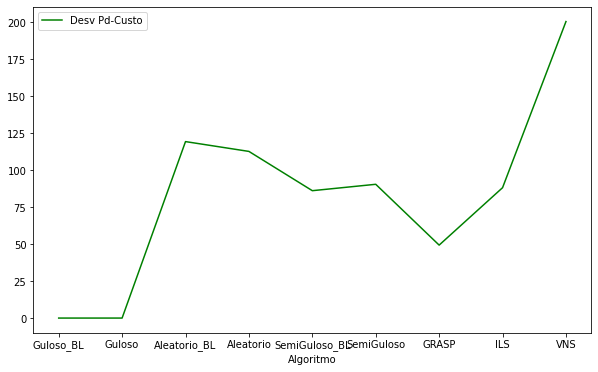

In [33]:
import matplotlib.pyplot as plt
#Coef VAR(%)-Custo	Desv Pd-Custo	Md Tempo	Coef VAR(%)-TEMPO	Desv Pd-TEMPO
df_kpf_1=df[df['Instancia']=='kpf_1']

ax = plt.gca()
#df_kpf_1.plot(kind='line', x='Algoritmo', y='Md Custo', color='blue', ax=ax, figsize=(10,6))
df_kpf_1.plot(kind='line', x='Algoritmo', y='Desv Pd-Custo', color='green', ax=ax, figsize=(10,6))
#df_kpf_1.plot(kind='line', x='Algoritmo', y='Coef VAR(%)-TEMPO', color='yellow', ax=ax, figsize=(10,6))


plt.show()



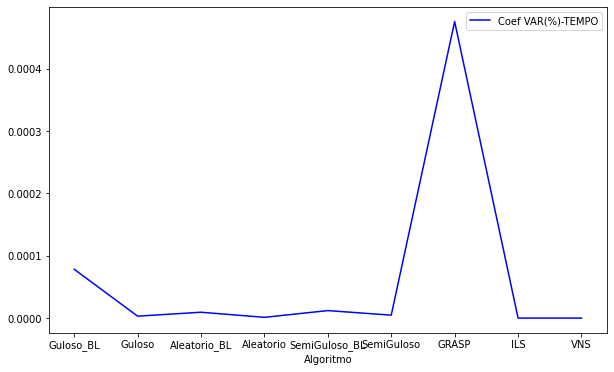

In [34]:
ax = plt.gca()
#df_kpf_1.plot(kind='line', x='Algoritmo', y='Md Tempo', color='blue', ax=ax, figsize=(10,6))
#df_kpf_1.plot(kind='line', x='Algoritmo', y='Desv Pd-Custo', color='green', ax=ax, figsize=(10,6))
df_kpf_1.plot(kind='line', x='Algoritmo', y='Coef VAR(%)-TEMPO', color='blue', ax=ax, figsize=(10,6))
plt.show()



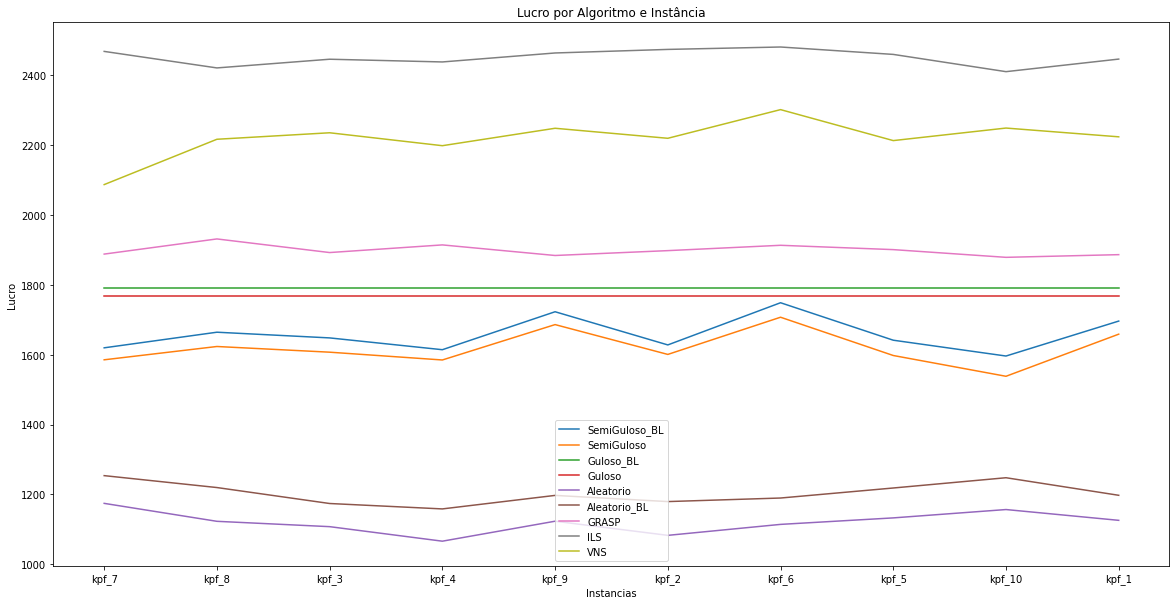

In [35]:

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df[df['Algoritmo']=='SemiGuloso_BL']['Instancia'], df[df['Algoritmo']=='SemiGuloso_BL']['Md Custo'], label='SemiGuloso_BL')
ax.plot(df[df['Algoritmo']=='SemiGuloso']['Instancia'], df[df['Algoritmo']=='SemiGuloso']['Md Custo'], label='SemiGuloso')
ax.plot(df[df['Algoritmo']=='Guloso_BL']['Instancia'], df[df['Algoritmo']=='Guloso_BL']['Md Custo'], label='Guloso_BL')
ax.plot(df[df['Algoritmo']=='Guloso']['Instancia'], df[df['Algoritmo']=='Guloso']['Md Custo'], label='Guloso')
ax.plot(df[df['Algoritmo']=='Aleatorio']['Instancia'], df[df['Algoritmo']=='Aleatorio']['Md Custo'], label='Aleatorio')
ax.plot(df[df['Algoritmo']=='Aleatorio_BL']['Instancia'], df[df['Algoritmo']=='Aleatorio_BL']['Md Custo'], label='Aleatorio_BL')
ax.plot(df[df['Algoritmo']=='GRASP']['Instancia'], df[df['Algoritmo']=='GRASP']['Md Custo'], label='GRASP')
ax.plot(df[df['Algoritmo']=='ILS']['Instancia'], df[df['Algoritmo']=='ILS']['Md Custo'], label='ILS')
ax.plot(df[df['Algoritmo']=='VNS']['Instancia'], df[df['Algoritmo']=='VNS']['Md Custo'], label='VNS')
ax.set_xlabel('Instancias')
ax.set_ylabel('Lucro')
ax.set_title("Lucro por Algoritmo e Instância")
ax.legend()
plt.show()

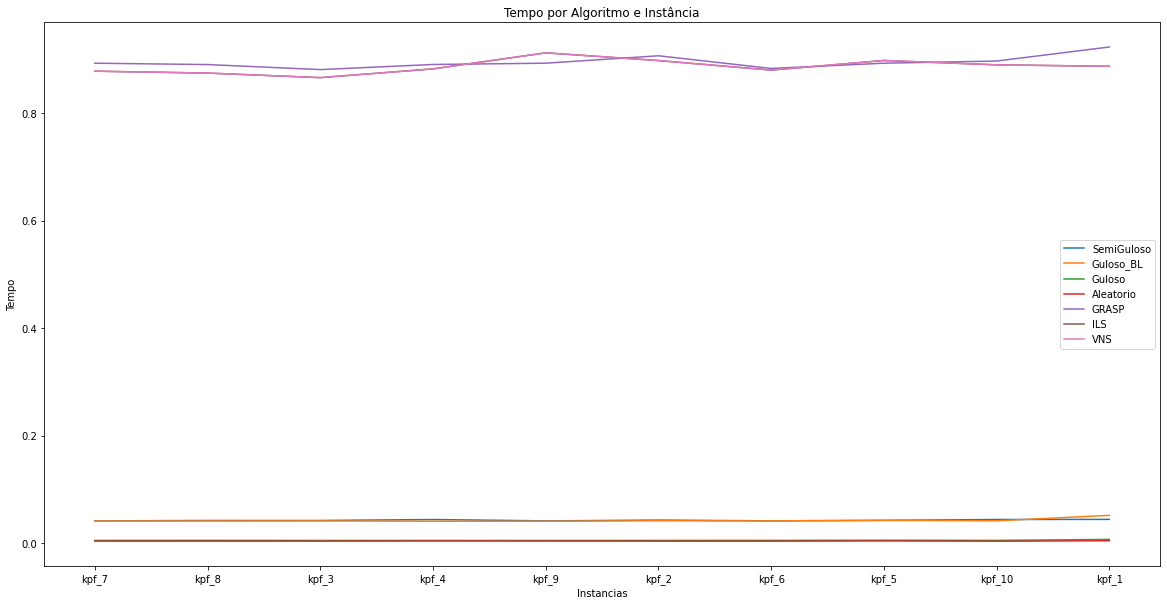

In [36]:
fig, ax = plt.subplots(figsize=(20, 10))
#ax.plot(df[df['Algoritmo']=='SemiGuloso_BL']['Instancia'], df[df['Algoritmo']=='SemiGuloso_BL']['Md Tempo'], label='SemiGuloso_BL')
ax.plot(df[df['Algoritmo']=='SemiGuloso']['Instancia'], df[df['Algoritmo']=='SemiGuloso']['Md Tempo'], label='SemiGuloso')
ax.plot(df[df['Algoritmo']=='Guloso_BL']['Instancia'], df[df['Algoritmo']=='Guloso_BL']['Md Tempo'], label='Guloso_BL')
ax.plot(df[df['Algoritmo']=='Guloso']['Instancia'], df[df['Algoritmo']=='Guloso']['Md Tempo'], label='Guloso')
ax.plot(df[df['Algoritmo']=='Aleatorio']['Instancia'], df[df['Algoritmo']=='Aleatorio']['Md Tempo'], label='Aleatorio')
ax.plot(df[df['Algoritmo']=='GRASP']['Instancia'], df[df['Algoritmo']=='GRASP']['Md Tempo'], label='GRASP')
ax.plot(df[df['Algoritmo']=='ILS']['Instancia'], df[df['Algoritmo']=='ILS']['Md Tempo'], label='ILS')
ax.plot(df[df['Algoritmo']=='VNS']['Instancia'], df[df['Algoritmo']=='VNS']['Md Tempo'], label='VNS')
#ax.plot(df[df['Algoritmo']=='Aleatorio_BL']['Instancia'], df[df['Algoritmo']=='Aleatorio_BL']['Md Tempo'], label='Aleatorio_BL')
ax.set_xlabel('Instancias')
ax.set_ylabel('Tempo')
ax.set_title("Tempo por Algoritmo e Instância")
ax.legend()
plt.show()